# Visualizing Earnings Based On College Majors

In this project, I will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. [FiveThirtyEight](https://fivethirtyeight.com/) cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. 

Following are the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.
* `Full_time_year_round` - Employed at least 50 weeks and at least 35 hours
* `Unemployed` - Number unemployed
* `Unemployment_rate` - Unemployed / (Unemployed + Employed)
* `P25th` - 25th percentile of earnings
* `P75th`	75th percentile of earnings
* `College_jobs` - Number with job requiring a college degree
* `Non_college_jobs` - Number with job not requiring a college degree

Using visualizations, we can start to explore questions from the dataset like:

**Do students in more popular majors make more money?**
 * *Using scatter plots*
 
**How many majors are predominantly male? Predominantly female?**
 * *Using histograms*
 
**Which category of majors have the most students?**
 * *Using bar plots*

## Setting up the environment
Before we start creating data visualizations, let's import the libraries we need and run the necessary Jupyter magic so that plots are displayed inline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading and exploring the data

In [2]:
#Reading `recent-grads.csv` into pandas and assigning the resulting DataFrame to `recent_grads`
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
#Using `DataFrame.iloc[]` to return the first row formatted as a table
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [4]:
#Using `DataFrame.head()` and `DataFrame.tail()` to become familiar with the structure of data
print(recent_grads.head())
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

**Engineering majors have the highest median salaries, taking the top 5 spots.** \
PS: The dataset is ordered by `Rank` column which orders rows according to median salary in decreasing order.

In [5]:
#Using `DataFrame.describe()` to generate summary statistics for all of the numeric columns
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NUCLEAR ENGINEERING,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


## Removing (dropping) rows containing null values

Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [6]:
# Assigning the number of rows in `recent_grads` to `raw_data_count`
raw_data_count = recent_grads.shape[0]
print("Initial no. of rows = "+str(raw_data_count))

Initial no. of rows = 173


In [7]:
# Using `DataFrame.dropna()` to drop rows containing missing values and assigning the resulting DataFrame back to `recent_grads`
recent_grads = recent_grads.dropna()

In [8]:
# Look up the number of rows in `recent_grads` now and assigning the value to `cleaned_data_count`
cleaned_data_count = recent_grads.shape[0]
print("No. of rows after cleaning = "+str(cleaned_data_count))

No. of rows after cleaning = 172


On comparing `cleaned_data_count` and `raw_data_count`, we notice that only one row contained missing values and was dropped.

## Exploring relations through Scatter Plots

Exploring the relation: **`Sample_size`** and **`Median`**

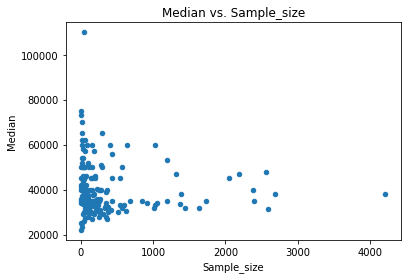

In [9]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size')

Inferences that can be made from this plot are:

* There is no correlation between `Sample_size` and `Median`. 
* Large samples are not associated with outlier Median salary values. 
* Since information for unweighted samples of people are recorded, samples may not accurately represent the population of graduates.

Exploring the relation: **`Sample_size`** and **`Unemployment_rate`**

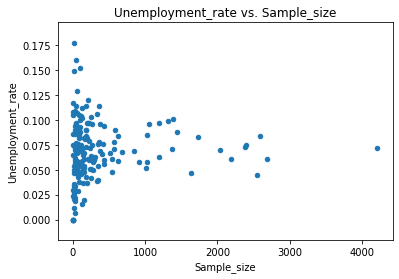

In [10]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment_rate vs. Sample_size')

Inferences from the above plot:

* There is variation in unemployment rates among majors with small sample sizes. Hence, the sample sizes may affect the effectiveness of relationship.
* In addition, from reviewing some rows of dataframe, there is a noticeable difference between size of sample and the number of graduates from whom data is collected. For instance, in Petroleum Engineering (rank 1) there is a sample size of 36 and a total of (1976+37) employed and unemployed.

This suggests that `Sample_size` is not directly comparable to statistics other than `Median`.

Exploring the relation: **`Full_time`** and **`Median`**

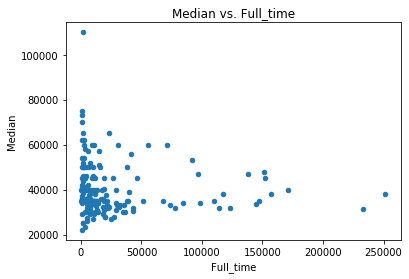

In [11]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median vs. Full_time')

There is no noticeable correlation between median salary and the number of graduates employed full-time.

Exploring the relation: **`ShareWomen`** and **`Unemployment_rate`**

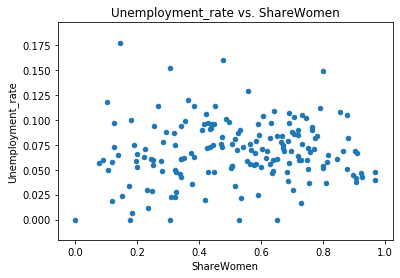

In [12]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Unemployment_rate vs. ShareWomen')

There doesn't seem to be a strong relationship between the proportion of female graduates in a course and the unemployment rate.

Exploring the relation: **`Men`** and **`Median`**

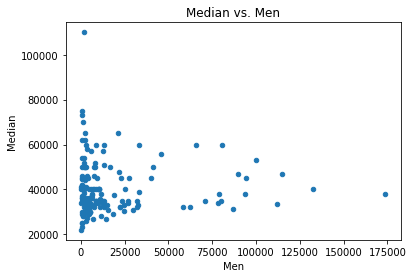

In [13]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Median vs. Men')

No direct corelation can be observed from the above scatterplot.

## Exploring some questions through Scatter Plots

Exploring the question: **Do students in more popular majors make more money?**

In [14]:
# Finding out the number of `Major` and `Major_category`
print("Number of distinct majors listed in the dataset = {}".format(recent_grads['Major'].nunique()))
print("Number of distinct major categories listed in the dataset = {}".format(recent_grads['Major_category'].nunique()))

Number of distinct majors listed in the dataset = 172
Number of distinct major categories listed in the dataset = 16


There are a total of 172 majors spread across 16 categories which makes it harder to see patterns across them.

So we need to do some analysis by finding out the popular majors and the median salaries of graduates who were enrolled in those pupular majors.

Out of all the data (columns), popularity of a particular major can be inferred from the total number of men and women who were enrolled in that major.     

For the analysis purpose we'll make a separate dataset called `majors` that will be indexed by `Major` column of our original dataset `recent_grads`.
The `Median` column in `recent_grads` will be used to calculate median salary of graduates of a particular major.
The `Women` and `Men` column in `recent_grads` will be used to calculate total number of graduates of a particular major.

Thus, the data dictionary of `majors` dataframe will be:

* `women_grads` - Women graduates in a major.
* `men_grads` - Men graduates in a major.
* `total_grads` - Total graduates in a major.
* `median_sal` - Median salary of full-time, year-round workers who took that major.

Let's perform the analysis.

In [15]:
# Create a list of all the majors
majors = recent_grads["Major"].unique()

In [16]:
# Aggregating `Median`, `Women` and `Men` across majors

# Create an empty dictionary
median = {}
# Loop through majors, calculate mean median and add to dictionary
for m in majors:
    median_mean = recent_grads.loc[recent_grads["Major"] == m, "Median"].mean()
    median[m] = median_mean
    
# Create an empty dictionary
women = {}
# Loop through majors, calculate the total number of women in each major and add to dictionary
for m in majors:
    no_of_women = recent_grads.loc[recent_grads["Major"] == m, "Women"].sum()
    women[m] = no_of_women

# Create an empty dictionary
men = {}
# Loop through majors, calculate the total number of women in each major and add to dictionary
for m in majors:
    no_of_men = recent_grads.loc[recent_grads["Major"] == m, "Men"].sum()
    men[m] = no_of_men

In [17]:
# Converting dictionaries into series objects
median_s = pd.Series(median)
women_s = pd.Series(women)
men_s = pd.Series(men)

# Calculate the total graduates in each major 
total_s = men_s + women_s

# The dictionary keys (majors) became the index in the Series obj (median_s, women_s, men_s)
# This index can be used for the dataframe
# Converting `total_s` series into  `majors` dataframe
majors = pd.DataFrame(total_s,columns=['total_grads'])

# Now, the `majors` dataframe is indexed by majors and will contain 'total_grads' column
print(majors)

                                           total_grads
PETROLEUM ENGINEERING                           2339.0
MINING AND MINERAL ENGINEERING                   756.0
METALLURGICAL ENGINEERING                        856.0
NAVAL ARCHITECTURE AND MARINE ENGINEERING       1258.0
CHEMICAL ENGINEERING                           32260.0
...                                                ...
ZOOLOGY                                         8409.0
EDUCATIONAL PSYCHOLOGY                          2854.0
CLINICAL PSYCHOLOGY                             2838.0
COUNSELING PSYCHOLOGY                           4626.0
LIBRARY SCIENCE                                 1098.0

[172 rows x 1 columns]


In [18]:
# Adding `men_s`, `women_s` and `median_s` series into `majors` under column headings `men_grads`, `women_grads`, `median_sal`
# All series will share same index
majors["women_grads"] = women_s
majors["men_grads"] = men_s
majors["median_sal"] = median_s

# Sorting `majors` in descending order of `total_grads` so as to order them in decreasing order of popularity 
# Keeping `median_sal` as the second parameter for sorting to order rows with same `total_grads` through `median_sal`
majors.sort_values(by=['total_grads','median_sal'], ascending=False, inplace=True)

# looking at the top 10 majors
majors.head(10)

,total_grads,women_grads,men_grads,median_sal
PSYCHOLOGY,393735.0,307087.0,86648.0,31500.0
BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,156118.0,173809.0,38000.0
BIOLOGY,280709.0,168947.0,111762.0,33400.0
GENERAL BUSINESS,234590.0,102352.0,132238.0,40000.0
COMMUNICATIONS,213996.0,143377.0,70619.0,35000.0
NURSING,209394.0,187621.0,21773.0,48000.0
MARKETING AND MARKETING RESEARCH,205211.0,126354.0,78857.0,38000.0
ACCOUNTING,198633.0,104114.0,94519.0,45000.0
ENGLISH LANGUAGE AND LITERATURE,194673.0,136446.0,58227.0,32000.0
POLITICAL SCIENCE AND GOVERNMENT,182621.0,88741.0,93880.0,38000.0


There doesn't seem to be any correlation between `total_grads` and `median_sal` in 10 most popular majors.
Let's have a look at the trend of `median_sal` vs. `total_grads` across entire `majors` dataset through a scatter plot. 

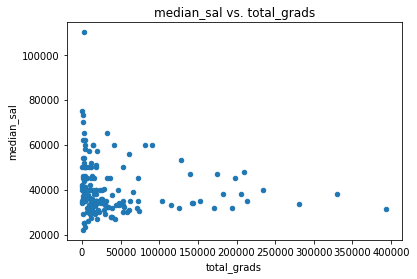

In [19]:
majors.plot(x='total_grads', y='median_sal', kind='scatter', title='median_sal vs. total_grads')

The median salaries are highest (>$45000) (more than 75 percentile) in those majors which don't have a very large number of graduates (<250000).
So, we can conclude that **Students in more popular majors don't make more money.**

Exploring the question: **Do students that majored in subjects that were majority female make more money?**

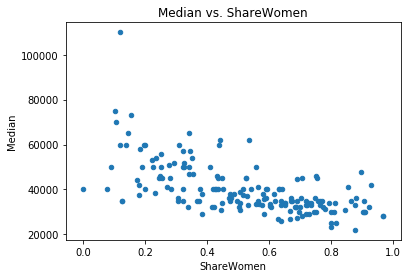

In [20]:
# Exploring share of women and median salary corresponding to that major
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Median vs. ShareWomen')

There appears to be a negative correlation between `Median` and `ShareWomen`.
To confirm it, let's observe the graph more closely by seting axes limit.

(0, 1)

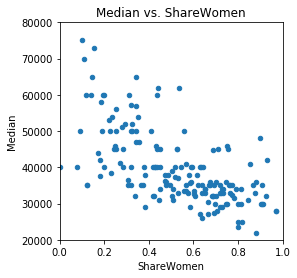

In [21]:
ax1 = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Median vs. ShareWomen',figsize=(4,4))
ax1.set_ylim(20000,80000)
ax1.set_xlim(0,1)

It can be thus inferred that **students who majored in subjects that were majority female make less money.**

Exploring the question: **Is there any link between the number of full-time employees and median salary?**

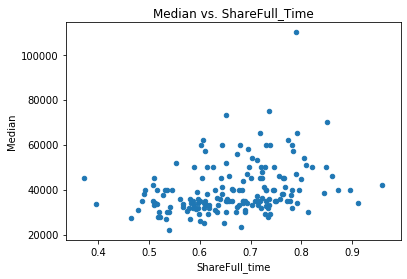

In [22]:
# Calculating share of full-time employees
recent_grads["ShareFull_time"] = recent_grads["Full_time"]/recent_grads["Total"]
# Plotting scatter plot to look for link between `ShareFull_Time` and `Median`
recent_grads.plot(x='ShareFull_time', y='Median', kind='scatter', title='Median vs. ShareFull_Time')

There appears to be a weak positive correlation between `Median` and `ShareFull_Time`.
To confirm it, let's observe the graph more closely by seting axes limit.

(0, 80000)

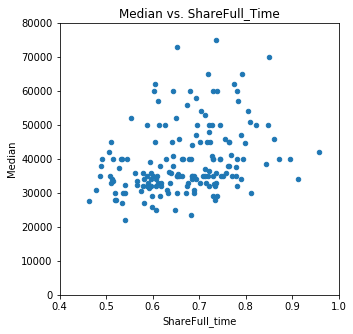

In [23]:
ax1 = recent_grads.plot(x='ShareFull_time', y='Median', kind='scatter', title='Median vs. ShareFull_Time',figsize=(5,5))
ax1.set_xlim(0.4,1.0)
ax1.set_ylim(0,80000)

It seems that **more the number of full-time employees among the recent graduates of a major, higher is the median salary of that major.**

## Exploring the distributions of columns through Histograms

Exploring the distributions of 
* **Sample_size**
* **Median**
* **Employed**
* **Full_time**
* **ShareWomen**
* **Unemployment_rate**
* **Men**
* **Women**

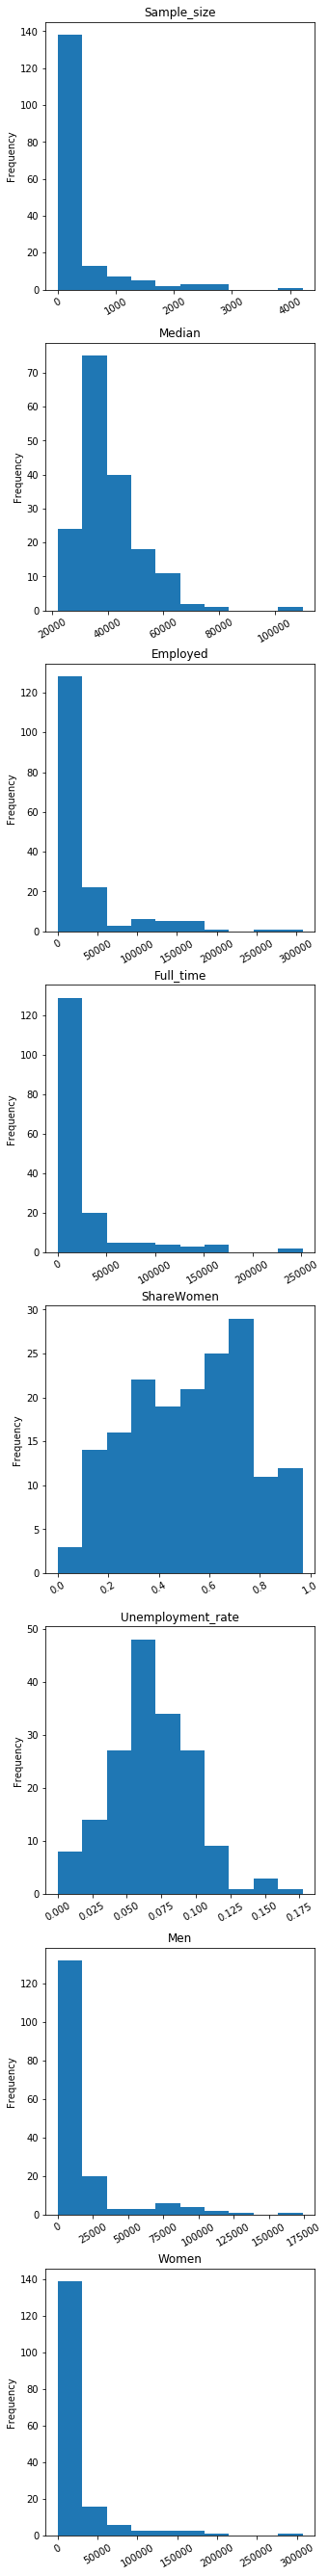

In [24]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig = plt.figure(figsize=(5,48))
for r in range(0,8):
    ax=fig.add_subplot(8,1,r+1)
    ax=recent_grads[cols[r]].plot(kind='hist', rot=30)
    ax.set_title(cols[r])

### Finding the percent of majors which are predominantly female

Text(0, 0.5, 'Number of Majors')

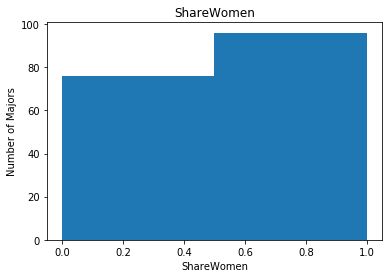

In [25]:
# Finding the proportion of Women predominant majors by binning `ShareWomen`
ax1 = recent_grads['ShareWomen'].hist(bins=2,range=(0,1),grid=False)
ax1.set_title('ShareWomen')
ax1.set_xlabel('ShareWomen')
ax1.set_ylabel('Number of Majors')

Thus, it's evident that more percent of majors are predominantly female.

In [26]:
#Calculating the number of female predominant majors
women = recent_grads[recent_grads['Women'] > (recent_grads['Total']/2)]
women.shape[0]/recent_grads.shape[0]

0.5581395348837209

**Thus, about 56% majors are predominanty female.**

### Finding the percent of majors which are predominantly male

Text(0, 0.5, 'Number of Majors')

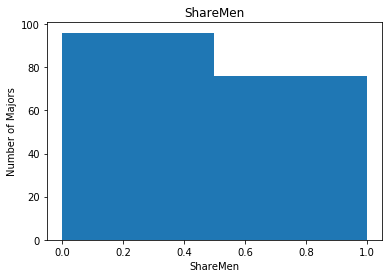

In [27]:
# Calculating the share of male
recent_grads["ShareMen"] = 1 - recent_grads["ShareWomen"]
# Finding the proportion of Men predominant majors by binning `ShareMen`
ax1 = recent_grads['ShareMen'].hist(bins=2,range=(0,1),grid=False)
ax1.set_title('ShareMen')
ax1.set_xlabel('ShareMen')
ax1.set_ylabel('Number of Majors')

In [28]:
# Calculating the number of male predominant majors
men = recent_grads[recent_grads['Men'] > (recent_grads['Total']/2)]
men.shape[0]/recent_grads.shape[0]

0.4418604651162791

**Thus, about 44% majors are predominanty male.**

### Finding the most common median salary range

Text(0.5, 1.0, 'Median')

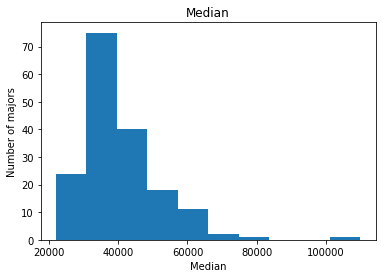

In [29]:
ax1 = recent_grads['Median'].plot(kind='hist')
ax1.set_xlabel("Median")
ax1.set_ylabel("Number of majors")
ax1.set_title("Median")

As seen in the histogram above, **the most common median salary range is 30000-40000.**

## Exploring potential relationships and distributions simultaneously through Scatter Matrix Plots

Since scatter matrix plots are frequently used in exploratory data analysis, pandas contains a function named scatter_matrix() that generates the plots for us. This function is part of the `pandas.plotting` module and needs to be imported separately.

In [30]:
# Importing `scatter_matrix` from the `pandas.plotting` module
from pandas.plotting import scatter_matrix

Exploring **`Sample_size`** and **`Median`**  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028023474BC8>,
      dtype=object)

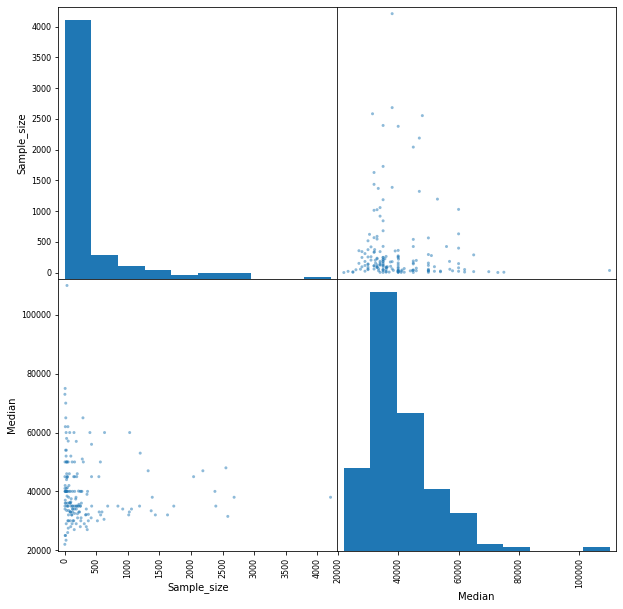

In [31]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

There doesn't seem to be any relationship between `Median` and `Sample_size`

Exploring **`Sample_size`**, **`Median`** and **`Unemployment_rate`** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002802331FD88>,
      dtype=object)

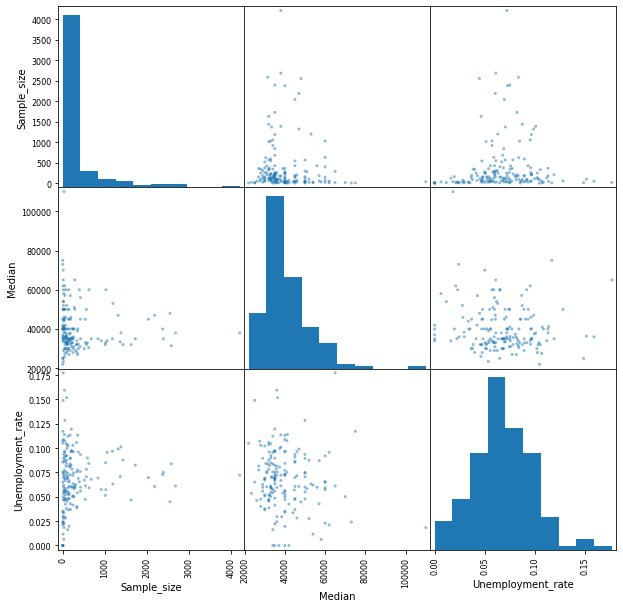

In [32]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

There doesn't seem to be any relationship between `Median`,   `Sample_size` and `Unemployment_rate` too.

### Using Bar Plots for comparison

Using bar plot to compare the percentages of women (**`ShareWomen`**) from the first ten rows and last ten rows of the `recent_grads` dataframe.

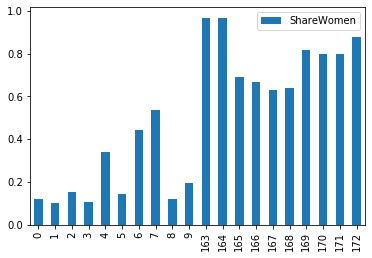

In [33]:
recent_grads[:10].append(recent_grads[-10:]).plot.bar(y='ShareWomen')

Following inferences can be made from above plot:
* **The last 10 majors have a greater share of women than the first 10 majors.** 
* **The courses with the highest median salaries have a lower share of female graduates than those with the lowest median salaries, which are majority female (i.e. over 50% of the graduates are women).** 

Let's explore this difference more.

In [34]:
#Calculating the average proportion of female graduates for the top 10 and bottom 10 courses
top_10_sharewomen = recent_grads[:9]['ShareWomen'].mean()
bottom_10_sharewomen = recent_grads[-10:]['ShareWomen'].mean()

print("The top 10 highest paying courses have an average women share of {:.2f}".format(top_10_sharewomen))
print("The bottom 10 paying courses have an average women share of {:.2f}".format(bottom_10_sharewomen))

The top 10 highest paying courses have an average women share of 0.23
The bottom 10 paying courses have an average women share of 0.79


**The difference in the average share of women graduates between the top and bottom 10 courses (in terms of median salary) is over 50% which is in agreement with the observation made from the plot.**

Using bar plot to compare the rate of unemployment (**`Unemployment_rate`**) from the first ten rows and last ten rows of the `recent_grads` dataframe.

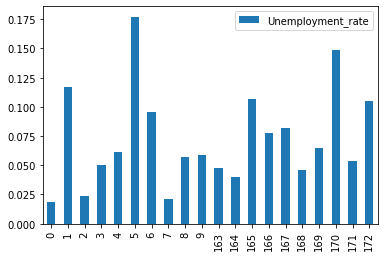

In [35]:
recent_grads[:10].append(recent_grads[-10:]).plot.bar(y='Unemployment_rate')

The top 10 courses have lower unemployment rates, apart from 2 exceptions. 
While for the bottom 10 have higher unemployment rates, apart from 3-4 exceptions.

### Grouped Bar Plot to compare the number of men with the number of women in each category of majors.

There are a total of 172 majors spread across 16 categories.

So we need to do some analysis by finding out major categories and the share of men and women who were enrolled in those major categories.

For the analysis purpose we'll make a separate dataset called `shares` that will be indexed by `Major_category` column of our original dataset `recent_grads`. The `ShareWomen` and `ShareMen` column in `recent_grads` will be used to calculate total of shares of men and women in a particular major category.

Thus, the data dictionary of `shares` dataframe will be:

* `sharemen` - Men as share of total in a major category.
* `sharewomen` - Men as share of total in a major category.

Let's perform the analysis.

In [36]:
# Create a list of all the major category
categories = recent_grads["Major_category"].unique()

In [37]:
# Aggregating `ShareMen`and `ShareWomen` across major categories

# Create an empty dictionary
women = {}
# Loop through categories, calculate the mean share of women in each major category and add to dictionary
for c in categories:
    share_w = recent_grads.loc[recent_grads["Major_category"] == c, "ShareWomen"].mean()
    women[c] = share_w

# Create an empty dictionary
men = {}
# Loop through categories, calculate the mean share of men in each major category and add to dictionary
for c in categories:
    share_m = recent_grads.loc[recent_grads["Major_category"] == c, "ShareMen"].mean()
    men[c] = share_m

In [38]:
# Converting dictionaries into series objects
women_share = pd.Series(women)
men_share = pd.Series(men)

# The dictionary keys (major categories) became the index in the Series obj (men_s, women_s)
# This index can be used for the dataframe
# Converting `women_share` series into  `major_categories` dataframe
major_categories = pd.DataFrame(women_share,columns=['sharewomen'])

# Now, the `major_categories` dataframe is indexed by major categories and will contain 'sharewomen' column
print(major_categories.head())

                         sharewomen
Engineering                0.238889
Business                   0.483198
Physical Sciences          0.508683
Law & Public Policy        0.483649
Computers & Mathematics    0.311772


In [39]:
# Adding `men_share` under column headings `sharemen`
# All series will share same index
major_categories["sharemen"] = men_share

# Sorting `major_categories` in ascending order of `sharewomen` 
major_categories.sort_values(by=['sharewomen'],inplace=True)

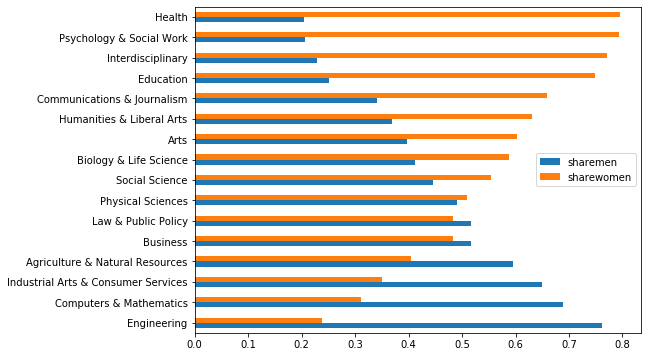

In [40]:
Share = major_categories[['sharemen','sharewomen']]
Share.plot.barh(figsize=(8,6))

**The share of men in following 6 major categories is higher than the share of women:**
* **Law & Public Policy**
* **Business**
* **Agriculture & Natural Resources**
* **Industrial Arts & Consumer Services**
* **Coomputers & Mathematics**
* **Engineering**

**The share of women in rest of the 10 major categories is higher than the share of men.**

### Box Plot to explore distributions

 Box Plot of **`Median`**

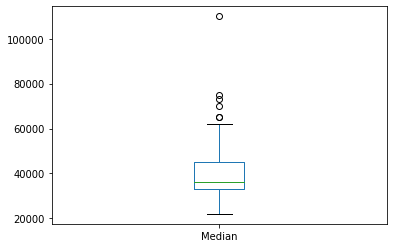

In [41]:
recent_grads['Median'].plot(kind='box')

This confirms that the **median salary is between 30000 and 40000.**

Box Plot of **`Unemployment_rate`**

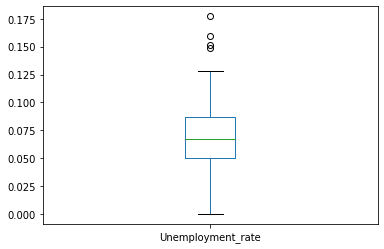

In [42]:
recent_grads['Unemployment_rate'].plot(kind='box')

**The median unemployment rate is around 0.07.**

### Hexagonal Bin Plot to visualize dense scatter plots

Hexbin plots can be a useful alternative to scatter plots if our data are too dense to plot each point individually.

Hexbin plot for **Unemployment_rate** vs **ShareWomen** .


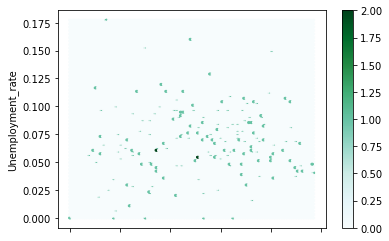

In [43]:
recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate')

This confirms that **`ShareWomen` and `Unemployment_rate` are not related.**

## Conclusion

Visualizations can help us identify and uncover patterns more easily, especially when the dataset contains many values.